# Automated load and dump detection for trucks with Light Gradient-Boosting Machine (LightGBM)

This notebook showcases the application of an automated algorithm for detecting loading and dumping events. LightGBM is employed, a highly efficient state-of-the-art gradient boosting framework that uses decision trees as weak learners. Additional insights into the methodology can be found in [Website Link] and [LaTeX Document].

# Required folder and data structure

The required folder structure, where 'data' folder is top level:

<pre>
data/                  <-- This is the top-level directory
└── GPSData/           <-- This is the second-level directory
    ├── trips/         <-- These are third-level directories
    └── tripInfo/      <-- These are third-level directories
</pre>


Folder 'trips' and 'tripsInfo' should contain GPS files on form MM-DD-YYYY.csv with columns:
* **trips**: TripLogId, Timestamp, Latitude, Longitude, Uncertainty
* **tripsInfo**: TripLogId, DumperMachineNumber, MachineType, LoadLongitude, LoadLatitude, DumpLongitude, DumpLatitude, MassTypeMaterial, Quantity 

# Initialize model

The custom machine learning class created for this project, LoadDumpLightGBM, utilizes functions in folder: **helper_functions** and in **load_dump_lightgbm.py**. LoadDumpLightGBM accepts the following initial (excluding directory) arguments:

* *group_size*: Defines the number of data points to be aggregated in the GPS dataset. A larger *group_size* results in a broader time window, enhancing the model's predictive accuracy for loading or dumping events within that timeframe. However, this comes at the cost of temporal precision regarding when these events occur.

* *nb_days*: Specifies the number of days to be analyzed. The option 'all' is available for those wishing to leverage their entire dataset. While utilizing more days is likely to improve predictive performance, it will also increase both data-loading and model-training time. The training time increases approximately linearly with *nb_days*.

* *starting_from*: Index to start from. A value of 0 implies all days in *nb_days* are employed.

In [1]:
GPS_DATA_DIRECTORY = "data/GPSData"

In [2]:
from load_dump_lightgbm import LoadDumpLightGBM
myModel = LoadDumpLightGBM(nb_days=1, gps_data_dir=GPS_DATA_DIRECTORY, machine_type="Dumper") 

Folders 'trips' and 'tripsInfo' correctly set up
Initializing class:
----------------------
Data over:  1 days.
Merging  5  consecutive timestamps
Model applies on machine type: Dumper
All data will be saved to the automatically created path:  data/ml_model_data


# Load GPS data and construct data set
The GPS data is loaded and processed to generate the features and output labels used in the machine learning algorithm. The data is divided into two sets: training data and unseen testing data. Each of these datasets is saved in its own unique folder within the data/ml_model_data directory. Folders are uniquely named based on the nb_days parameter, allowing for easy identification and retrieval. The naming convention for the test and training datasets follows this format: 
* Testing data: my_test_from_class_'nb_days'_days 
* Training data: my_train_from_class_'nb_days'_days.

In [3]:
myModel.load_data()

Start at day  03-07-2022
For machine type:  Dumper


100%|██████████| 1/1 [00:05<00:00,  5.08s/it]


# Fit model to training data
Before initiating the training process, the training data is partitioned into two subsets: a training set and a validation set, which comprise 80% and 20% of the data, respectively. The validation set serves a critical role in assessing the model's generalization performance, aiding in the identification of both underfitting and overfitting scenarios.

The training process is designed to terminate automatically based on a predefined early-stopping criterion. Specifically, the model stops training when the validation error fails to improve over a given number of *n* iterations. This approach ensures computational efficiency while guarding against overfitting.

Upon reaching the early-stopping condition, the fit_model method outputs relevant diagnostic information. This includes the specified early-stopping criterion, as well as the iteration where the validation error was minimized. Performance metrics for both the training and validation sets are reported in terms of multi-logloss, providing a comprehensive view of the model's efficacy.

In [4]:
myModel.fit_model()

Training until validation scores don't improve for 2 rounds
Early stopping, best iteration is:
[52]	Train's multi_logloss: 0.00654353	Val's multi_logloss: 0.151242


# Plot learning curve
The model's learning curve can be visualized using the *plot_learning_curve* method. This curve plots the multi-logloss metric against the number of iterations, offering insights into the model's learning process over time. The graph presents both training and validation errors, allowing for a nuanced understanding of the model's performance. Notably, the y-axis is set on a logarithmic scale, which helps in capturing the nuances of error reduction across iterations more effectively.

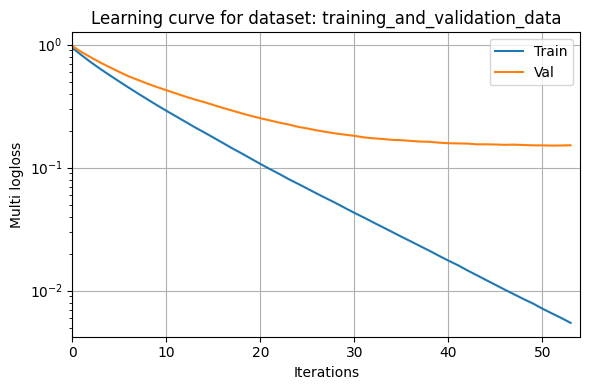

In [5]:
myModel.plot_learning_curve()

# Plot feature importances
The *plot_feature_importances* method visualizes the significance of each feature used during the training process. On the x-axis, the numerical values indicate the frequency with which a particular feature is employed to partition nodes in the decision trees. Essentially, features that contribute the most to information gain, or have the most negative impact on the error gradient, are used more frequently for splitting. A higher number on the x-axis thus corresponds to greater feature importance in the model's decision-making process.

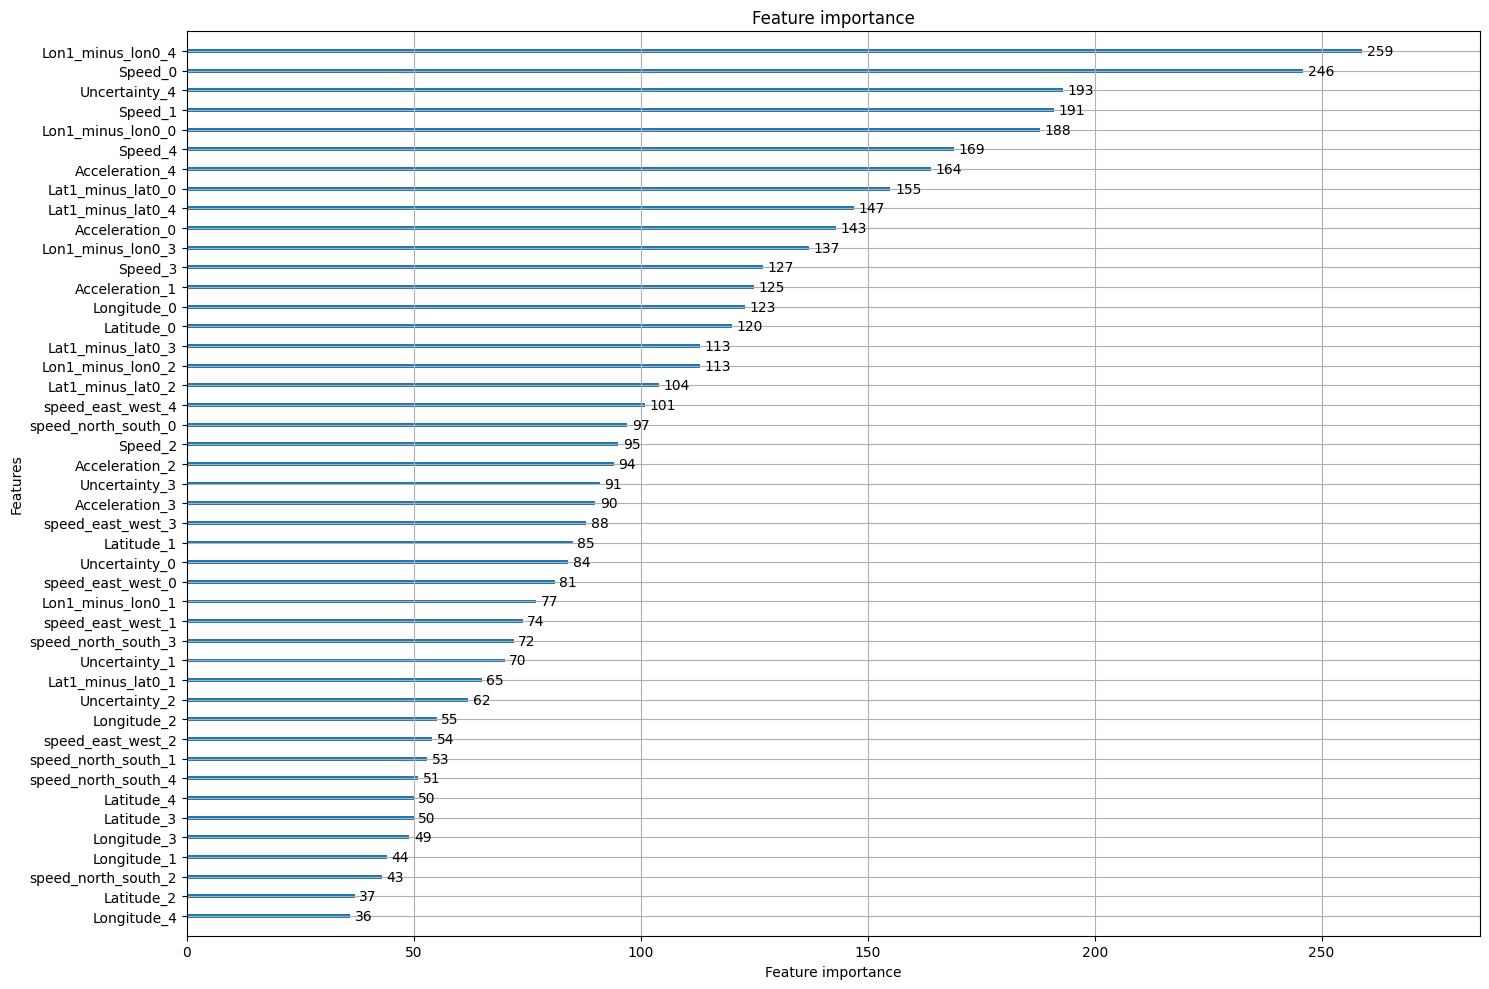

In [6]:
myModel.plot_feature_importances()

# Predict unseen data
The *predict_and_save_csv* method is responsible for generating predicted output labels, either "Driving," "Dump," or "Load", for the test dataset. This test dataset is located within the data/ml_model_data directory and is stored in a folder corresponding to the specific day under analysis. The method not only performs the predictions but also saves the results in a CSV file for easy access and further evaluation.

In [7]:
myModel.predict_and_save_csv()

# Plot statistics
The *plot_statistics* method visualizes key classification metrics - precision, recall, and F1-score - for each output label using a heatmap. This approach provides an intuitive and easily interpretable overview of the model's performance across different classes.

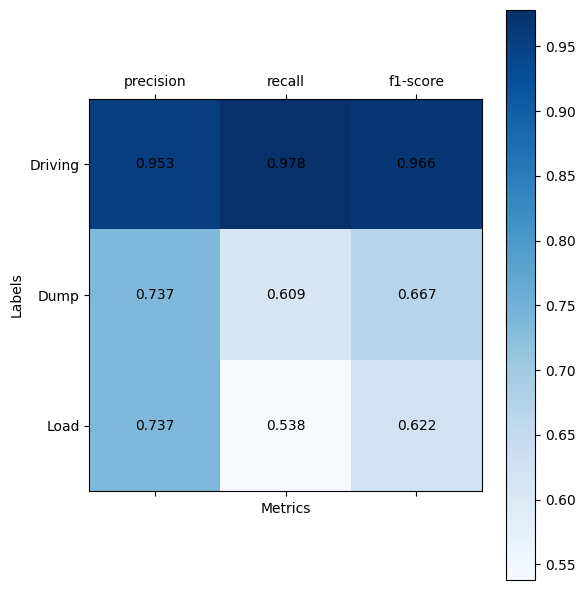

In [8]:
myModel.plot_statistics()

# Confusion matrix
The *plot_confusion_matrix* method visualizes the relationship between true and predicted labels using a heatmap format. The diagonal entries, starting from the top-left corner, represent correct classifications and ideally should have higher values relative to the other numbers in their respective rows and columns. This matrix serves as a comprehensive summary of the model's classification accuracy and its ability to distinguish between different classes.

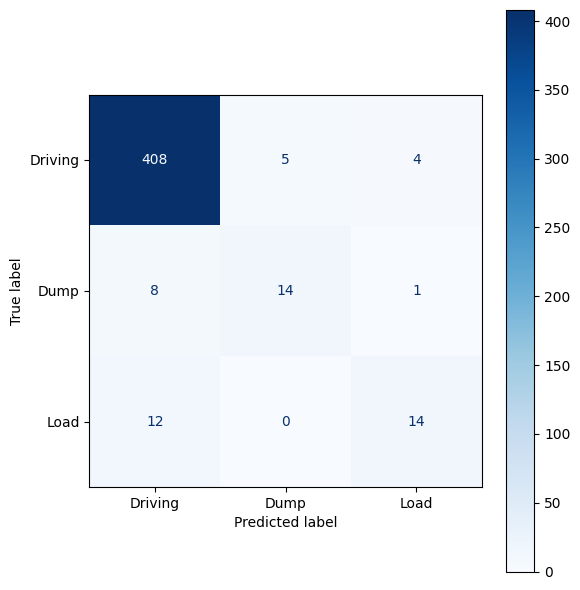

In [9]:
myModel.plot_confusion_matrix()